<a href="https://colab.research.google.com/github/bodePacker/Math-for-DS-A1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [12]:
def countFib():
    a, b = 1, 1
    n = 2

    while len(str(b)) < 1000:

      a, b = b, a + b
      n += 1

    return n, b
print(countFib())

(4782, 107006626638275893676498058445739688508368389663215166501323520337531452060469404062188914758248979265780469488817759195748433646667256995951299603046126274809248218614406943305123477444275027378175308757939166619214925918675955396642283714894311307469950343954700198543260972306729019287052644724372611771582182554849112052501320147861296593138179223555965745203950613755146783754322911960212993404826070617539770684706820289548690266618543512452190036948064135744747091170761976694569107009802439343961747410373691250323136553216477369702316775505159517351846057995491941096777837322966579658164651390348815425631018422419025984608800011018625555024549393711365165703944762958471454852342595042858242530608354443542821261100899286379504800689433030977321783486454311320576565986845628861680871869383529735064398629764066000072356291790520705116407761481249188583094594056668833910935094445657635766615161931775379289166158132715961687748798382182049252034847387438473677193451278702921863625

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [14]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')



=== Linear Regression ===
Train R²: 0.6089
Test R²: 0.5943
Train MAE: 0.5309
Test MAE: 0.5351
Train RMSE: 0.7235
Test RMSE: 0.7273

=== Ridge Regression ===
Train R²: 0.6089
Test R²: 0.5943
Train MAE: 0.5309
Test MAE: 0.5351
Train RMSE: 0.7235
Test RMSE: 0.7273

=== Random Forest ===
Train R²: 0.9726
Test R²: 0.7985
Train MAE: 0.1239
Test MAE: 0.3354
Train RMSE: 0.1915
Test RMSE: 0.5126

=== Feature Importance Comparison ===
      Feature  Linear_Coef  Ridge_Coef  RF_Importance  Linear_Abs  Ridge_Abs
0      MedInc     0.433333    0.433222       0.529104    0.433333   0.433222
5    AveOccup    -0.004745   -0.004746       0.135430    0.004745   0.004746
6    Latitude    -0.421449   -0.421424       0.085400    0.421449   0.421424
7   Longitude    -0.434166   -0.434125       0.085083    0.434166   0.434125
1    HouseAge     0.009293    0.009295       0.055597    0.009293   0.009295
2    AveRooms    -0.098643   -0.098428       0.046450    0.098643   0.098428
4  Population    -0.000008   -0

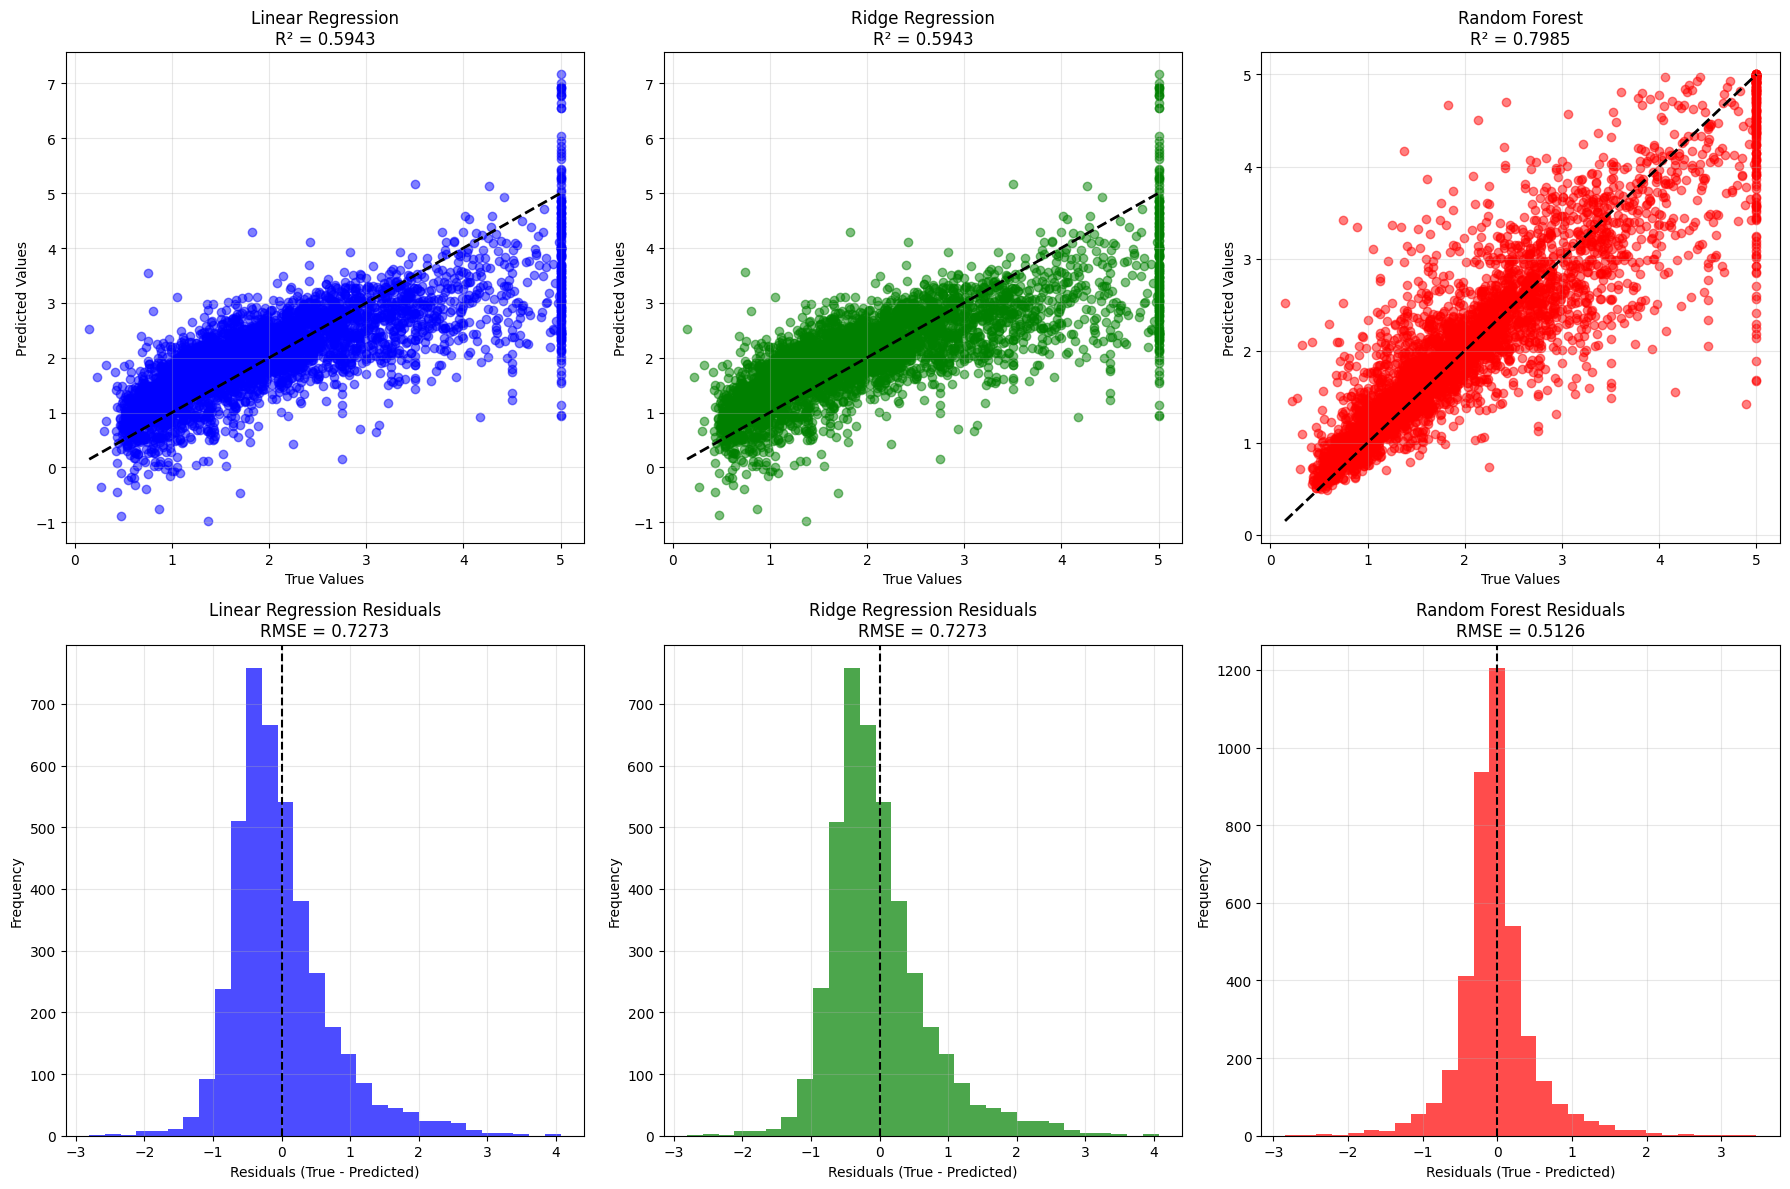

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create and train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store results
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'y_test_pred': y_test_pred
    }
    
    # Print results
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")

# Feature importance comparison
print("\n=== Feature Importance Comparison ===")

# Linear Regression coefficients
linear_model = results['Linear Regression']['model']
linear_importance = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Coef': linear_model.coef_
})

# Ridge Regression coefficients
ridge_model = results['Ridge Regression']['model']
ridge_importance = pd.DataFrame({
    'Feature': feature_names,
    'Ridge_Coef': ridge_model.coef_
})

# Random Forest feature importance
rf_model = results['Random Forest']['model']
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': rf_model.feature_importances_
})

# Combine all importance measures
importance_df = linear_importance.merge(ridge_importance, on='Feature').merge(rf_importance, on='Feature')
importance_df['Linear_Abs'] = np.abs(importance_df['Linear_Coef'])
importance_df['Ridge_Abs'] = np.abs(importance_df['Ridge_Coef'])
importance_df = importance_df.sort_values('RF_Importance', ascending=False)
print(importance_df)

# Create comprehensive visualizations for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Colors for each model
colors = ['blue', 'green', 'red']
model_names = list(results.keys())

# Row 1: Predicted vs True scatter plots
for i, (name, result) in enumerate(results.items()):
    axes[0, i].scatter(y_test, result['y_test_pred'], alpha=0.5, color=colors[i])
    axes[0, i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[0, i].set_xlabel('True Values')
    axes[0, i].set_ylabel('Predicted Values')
    axes[0, i].set_title(f'{name}\nR² = {result["test_r2"]:.4f}')
    axes[0, i].grid(True, alpha=0.3)

# Row 2: Residuals histograms
for i, (name, result) in enumerate(results.items()):
    residuals = y_test - result['y_test_pred']
    axes[1, i].hist(residuals, bins=30, alpha=0.7, color=colors[i])
    axes[1, i].set_xlabel('Residuals (True - Predicted)')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].set_title(f'{name} Residuals\nRMSE = {result["test_rmse"]:.4f}')
    axes[1, i].axvline(x=0, color='black', linestyle='--')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()





# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [18]:
# Import classification models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, roc_auc_score, average_precision_score, 
                           confusion_matrix, classification_report)
import seaborn as sns

# Create and train multiple classification models
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionary to store results
classification_results = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"\n=== {name} ===")
    
    # Train the model on standardized data
    classifier.fit(X_train_std, y_train)
    
    # Make predictions
    y_train_pred = classifier.predict(X_train_std)
    y_test_pred = classifier.predict(X_test_std)
    y_test_proba = classifier.predict_proba(X_test_std)[:, 1]  # Probability of positive class
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    
    # Store results
    classification_results[name] = {
        'model': classifier,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba,
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }
    
    # Print results
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    
    # Print classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

# Feature importance comparison (for models that support it)
print("\n=== Feature Importance Comparison ===")

# Logistic Regression coefficients
log_reg_model = classification_results['Logistic Regression']['model']
log_reg_importance = pd.DataFrame({
    'Feature': feature_names,
    'LogReg_Coef': np.abs(log_reg_model.coef_[0])
})

# Random Forest feature importance
rf_model = classification_results['Random Forest']['model']
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': rf_model.feature_importances_
})

# Combine importance measures
importance_comparison = log_reg_importance.merge(rf_importance, on='Feature')
importance_comparison = importance_comparison.sort_values('RF_Importance', ascending=False)
print(importance_comparison.head(10))  # Show top 10 most important features



=== Logistic Regression ===
Train Accuracy: 0.9890
Test Accuracy: 0.9825
ROC-AUC: 0.9957
Average Precision: 0.9974

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.95      0.98        42
      Benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


=== Random Forest ===
Train Accuracy: 1.0000
Test Accuracy: 0.9386
ROC-AUC: 0.9745
Average Precision: 0.9731

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.91      0.93      0.92        42
      Benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


=== SVM ===
Train Accuracy: 0.9890
Test Accuracy: 0.9649
ROC-AUC: 0.993

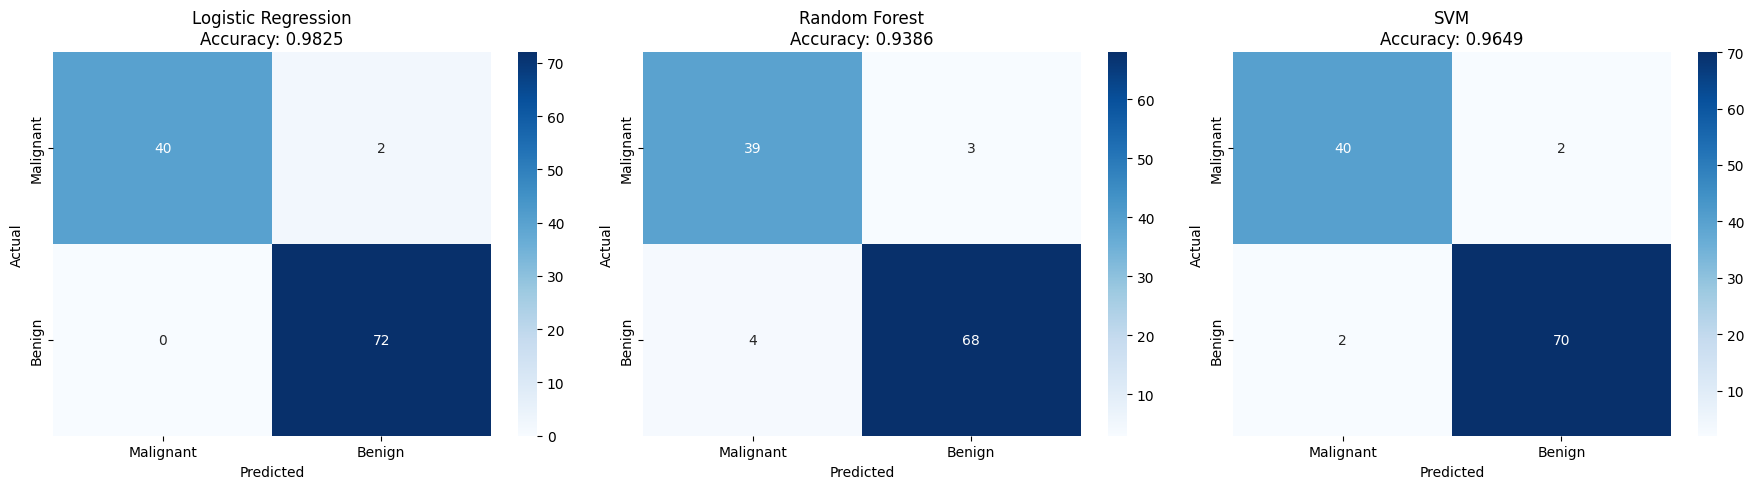

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, result) in enumerate(classification_results.items()):
    cm = result['confusion_matrix']
    
    # Create confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Malignant', 'Benign'], 
                yticklabels=['Malignant', 'Benign'], 
                ax=axes[i])
    axes[i].set_title(f'{name}\nAccuracy: {result["test_accuracy"]:.4f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()



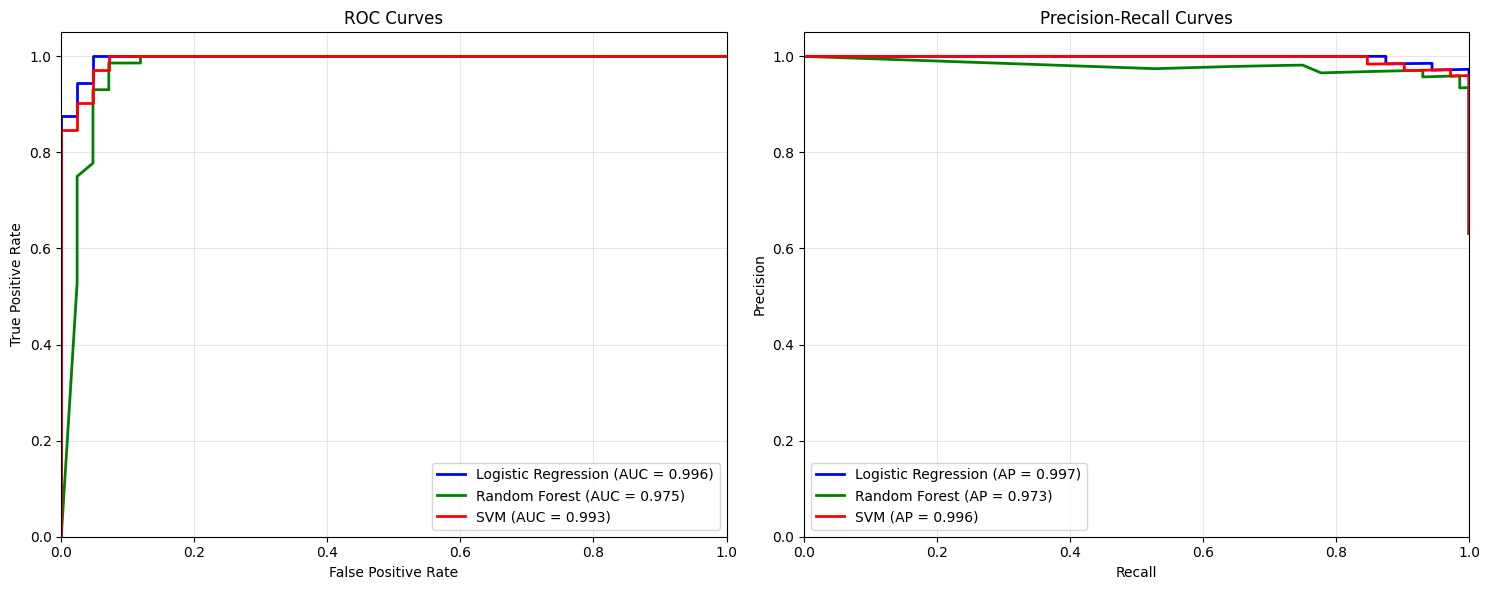


=== Model Performance Summary ===
Model                Test Acc   ROC-AUC    Avg Prec  
--------------------------------------------------
Logistic Regression  0.9825     0.9957     0.9974    
Random Forest        0.9386     0.9745     0.9731    
SVM                  0.9649     0.9934     0.9960    


In [ ]:
# ROC Curves and Precision-Recall Curves for all models
from sklearn.metrics import roc_curve, precision_recall_curve

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Colors for each model
colors = ['blue', 'green', 'red']
model_names = list(classification_results.keys())

# Plot 1: ROC Curves
for i, (name, result) in enumerate(classification_results.items()):
    fpr, tpr, _ = roc_curve(y_test, result['y_test_proba'])
    roc_auc = result['roc_auc']
    
    axes[0].plot(fpr, tpr, color=colors[i], lw=2, 
                label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line for random classifier
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# Plot 2: Precision-Recall Curves
for i, (name, result) in enumerate(classification_results.items()):
    precision, recall, _ = precision_recall_curve(y_test, result['y_test_proba'])
    avg_precision = result['avg_precision']
    
    axes[1].plot(recall, precision, color=colors[i], lw=2,
                label=f'{name} (AP = {avg_precision:.3f})')

axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curves')
axes[1].legend(loc="lower left")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [23]:
# Display complete raw feature importance data
print("=== COMPLETE FEATURE IMPORTANCE DATA ===\n")

# Sort by Random Forest importance (descending)
complete_importance = importance_comparison.sort_values('RF_Importance', ascending=False)

print("Rank | Feature Name                | Logistic Reg | Random Forest")
print("-" * 70)

for i, (idx, row) in enumerate(complete_importance.iterrows(), 1):
    feature_name = row['Feature']
    log_coef = row['LogReg_Coef']
    rf_imp = row['RF_Importance']
    
    print(f"{i:2d}   | {feature_name:<26} | {log_coef:>11.6f} | {rf_imp:>11.6f}")

print(f"\nTotal features: {len(complete_importance)}")


=== COMPLETE FEATURE IMPORTANCE DATA ===

Rank | Feature Name                | Logistic Reg | Random Forest
----------------------------------------------------------------------
 1   | worst area                 |    0.867473 |    0.173312
 2   | worst concave points       |    0.861898 |    0.152609
 3   | worst perimeter            |    0.798322 |    0.101175
 4   | mean concave points        |    0.963098 |    0.080006
 5   | mean perimeter             |    0.488950 |    0.070302
 6   | mean concavity             |    0.737279 |    0.061788
 7   | worst radius               |    0.984451 |    0.060198
 8   | area error                 |    0.840148 |    0.044393
 9   | mean radius                |    0.539206 |    0.041989
10   | mean area                  |    0.572351 |    0.038051
11   | worst concavity            |    0.763794 |    0.032195
12   | worst compactness          |    0.178726 |    0.015480
13   | worst texture              |    0.973369 |    0.015162
14   | radius e